In [0]:
# Author: Sahil Kalra
# Code Courtesy: https://www.linkedin.com/pulse/building-convolutional-neural-network-using-numpy-from-ahmed-gad/
# Thanks to : Ahmed Gad

# Good article to understand concepts like padding, stride and pooling:
1. https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148


Original Size:  (300, 451, 3)
Grayscale Size:  (300, 451)


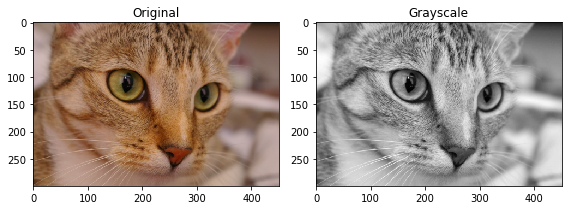

In [18]:
# Input image used for this code

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.chelsea()
print ("Original Size: ", original.shape)
# converting image to grayscale

grayscale = rgb2gray(original)
print ("Grayscale Size: ", grayscale.shape)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

If this grayscale image will be used in ANN, then the number of neurons required for input stage will be 300*451 = 135,300‬.<br>
Such a high number of Neurons in input will cause overfitting as well as it will take huge time to train the network.<br><br>
So we will use Convolution network to reduce the shape of image and then we will use ANN later.

In [22]:
# Step 2 Preparing filter
import numpy

# 2 Custom filters of 3*3
l1_filter = numpy.zeros((2,3,3))
print(l1_filter)

# Filters types: https://medium.com/datatype/deeplearning-ai-cnn-week-1-a0bac10d509b
# 1. Vertical     [1 0 -1]
                # [1 0 -1]
                # [1 0 -1]
                  
# 2. Horizontal   [ 1  1  1]
                # [ 0  0  0]
                # [-1 -1 -1]
                  
# 3. prewitt filter → sobel filter: more weighted for the center, more robust
                # [1 0 -1]
                # [2 0 -2]
                # [1 0 -1]

# Applying horizontal and vertical filters:

l1_filter[0, :, :] = numpy.array([[[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]])
l1_filter[1, :, :] = numpy.array([[[1, 1, 1],[0, 0, 0],[-1, -1, -1]]])
           

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [0]:
# 3. Convolution Layer
# 4. Pooling Layer
# 5. Relu Layer
import numpy
import sys

"""
Author : Sahil Kalra
Code Courtesy: https://github.com/ahmedfgad/NumPyCNN/blob/master/NumPyCNN.py
Thanks to : Ahmed Gad

"""

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result
def conv(img, conv_filter):

    if len(img.shape) != len(conv_filter.shape) - 1: # Check whether number of dimensions is the same
        print("Error: Number of dimensions in conv filter and image do not match.")  
        exit()
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            # If image is 3D (i.e. RGB) or higher dimension N , then we will convolve seperately all the dimensions 
            # and add them together as done below.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
                
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.
    

def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    # Stride or Stride+1, depends upon the implementation
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride+1),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = numpy.max([feature_map[r, c, map_num], 0])
    return relu_out


**Original Image Shape:  (300, 451, 3)

**Grayscale Image Shape:  (300, 451)

**Working with conv layer 1**
Filter  1
Filter  2

**ReLU**

**Pooling**

**Shape after Layer 1:  (149, 225, 2)
**End of conv layer 1**


**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**

**Shape after Layer 2:  (73, 111, 3)
**End of conv layer 2**


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**

**Shape after Layer 3:  (34, 53, 1)
**End of conv layer 3**



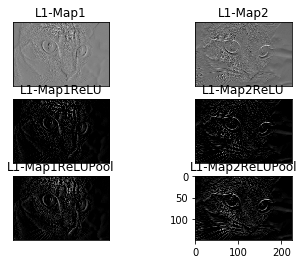

<Figure size 432x288 with 0 Axes>

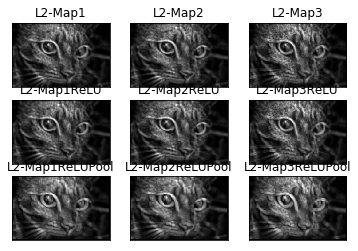

<Figure size 432x288 with 0 Axes>

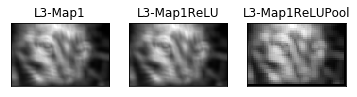

<Figure size 432x288 with 0 Axes>

In [59]:
import skimage.data
import numpy
import matplotlib

# Main Function

"""
Author: Sahil Kalra
Code Courtesy: https://github.com/ahmedfgad/NumPyCNN/blob/master/example.py
Thanks to : Ahmed Gad
"""

# Reading the image
#img = skimage.io.imread("test.jpg")
#img = skimage.data.checkerboard()
img = skimage.data.chelsea()
#img = skimage.data.camera()
print ("\n**Original Image Shape: ", img.shape)
# Converting the image into gray.
img = skimage.color.rgb2gray(img)
print ("\n**Grayscale Image Shape: ", img.shape)

# First conv layer
#l1_filter = numpy.random.rand(2,7,7)*20 # Preparing the filters randomly.
l1_filter = numpy.zeros((2,3,3))
l1_filter[0, :, :] = numpy.array([[[-1, 0, 1], 
                                   [-1, 0, 1], 
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = numpy.array([[[1,   1,  1], 
                                   [0,   0,  0], 
                                   [-1, -1, -1]]])

print("\n**Working with conv layer 1**")
l1_feature_map = conv(img, l1_filter)
print("\n**ReLU**")
l1_feature_map_relu = relu(l1_feature_map)
print("\n**Pooling**")
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
print ("\n**Shape after Layer 1: ", l1_feature_map_relu_pool.shape) 
print("**End of conv layer 1**\n")


# Second conv layer
l2_filter = numpy.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("\n**ReLU**")
l2_feature_map_relu = relu(l2_feature_map)
print("\n**Pooling**")
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)
print ("\n**Shape after Layer 2: ", l2_feature_map_relu_pool.shape) 
print("**End of conv layer 2**\n")


# Third conv layer
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
print("\n**ReLU**")
l3_feature_map_relu = relu(l3_feature_map)
print("\n**Pooling**")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
print ("\n**Shape after Layer 3: ", l3_feature_map_relu_pool.shape) 
print("**End of conv layer 3**\n")


# Graphing results
# Code Taken from: https://github.com/ahmedfgad/NumPyCNN/blob/master/example.py
fig0, ax0 = matplotlib.pyplot.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
matplotlib.pyplot.savefig("in_img.png", bbox_inches="tight")
matplotlib.pyplot.close(fig0)

# Layer 1
fig1, ax1 = matplotlib.pyplot.subplots(nrows=3, ncols=2)
ax1[0, 0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")

ax1[0, 1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")

ax1[1, 0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")

ax1[1, 1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")

ax1[2, 0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")

ax1[2, 1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")

matplotlib.pyplot.show()
matplotlib.pyplot.savefig("L1.png",bbox_inches='tight')
matplotlib.pyplot.close(fig1)

# Layer 2
fig2, ax2 = matplotlib.pyplot.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")

ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")

ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")

ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")

ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")

ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")

matplotlib.pyplot.show()
matplotlib.pyplot.savefig("L2.png", bbox_inches='tight')
matplotlib.pyplot.close(fig2)

# Layer 3
fig3, ax3 = matplotlib.pyplot.subplots(nrows=1, ncols=3)
ax3[0].imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")

ax3[1].imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")

ax3[2].imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")

matplotlib.pyplot.show()
matplotlib.pyplot.savefig("L3.png", bbox_inches='tight')
matplotlib.pyplot.close(fig3)

<br>

 <br>

<br>

<br>

Explainations sections


In [49]:
# This section shows the core logics, implemented in the below cell

# Four conditions to be checked for the filter and image before applying convolution

# 1. dimension of image should be 1 less than dimension of filter
print (len(img.shape), len(l1_filter.shape) - 1)
# 2. Check on image shape and filter shape
print (len(img.shape) > 2 , len(l1_filter.shape) > 3)
# 3. Filter should be square
print (l1_filter.shape[1], l1_filter.shape[2])
# 4. Filter should be odd dimensional, check on even dimensionality
print (l1_filter.shape[1]%2==0)




# Feature map to be prepared:
# Its dimension will be :
# 300-3+1 * 451-3+1 * number of filters (in this case 2)
# Therefore, dimension of feature map = 298*449*2
feature_maps = numpy.zeros((img.shape[0]-l1_filter.shape[1]+1, 
                                img.shape[1]-l1_filter.shape[1]+1, 
                                l1_filter.shape[0]))
print ("Feature Map Shape: ", feature_maps.shape)



# Convolving image by filter:
# Looping on all filters, here we have 2 filters 
# 1. Horizontal
# 2. Vertical,
# So l1_filter.shape[0] = 2, so this loop will run twice
for filter_num in range(l1_filter.shape[0]):
  # Getting the filter from bank, 
  # for filter_num = 0 --> Horizontal Filter 
  # fro filter_num = 1 --> Vertical Filter
    curr_filter = l1_filter[filter_num, :]
    print ("Filter_Num ", filter_num, " Shape : ", curr_filter.shape, "\n", curr_filter)

    # For higher order of convolutions, when the dimension will be greater than 2D
    if len(curr_filter.shape) > 2:
            # --> conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            # If image is 3D (i.e. RGB) or higher dimension N , then we will convolve seperately all the dimensions 
            # and add them together as done below.
            # Convolving each channel with the image and summing the results.

            # -->for ch_num in range(1, curr_filter.shape[-1]): 
            #     conv_map = conv_map + conv_(img[:, :, ch_num], 
            #                       curr_filter[:, :, ch_num])
            pass

            #Looping through the image to apply the convolution operation.

    # in case of first convolution for 2D grayscale image and 3*3 filter, simply convoving the image and filter 
    else: # There is just a single channel in the filter.
    # conv_ is the core convolution logic, explained as below
            # --> conv_map = conv_(img, curr_filter)
            # Parameters passed to conv_ are 
            # 1. img[:,:,0], i.e. 3D first 2 are the length and breadth of image, and third parameter is 0.
            # 2. curr_filter[:,:,0], again 3D
            # It returns the array holding sum of all features.

            # How the conv_ function works  intermediate steps are:
            filter_size = curr_filter.shape[1]
            result = numpy.zeros((img.shape))
            print ("\nFilter_size: ", filter_size)
            print ("\nResult 0 array of shape: ", result.shape)
            # formula to generate the required filtered size, i.e. 298*449

            # Row1    0 1 2 3 4 5 6 7 8 9 10  11  12  13  14  15
            # Row2    0 1 2 3 4 5 6 7 8 9 10  11  12  13  14  15
            # Row3    0 1 2 3 4 5 6 7 8 9 10  11  12  13  14  15
            # Row4    0 1 2 3 4 5 6 7 8 9 10  11  12  13  14  15
            # Row5    0 1 2 3 4 5 6 7 8 9 10  11  12  13  14  15
          
            # So the 3*3 convolve will return result of 3*13, start from "1" in Row2 to "14" in row4
            # So the convolve of  
                                  # Row1    0 1 2 
                                  # Row2    0 1 2 
                                  # Row3    0 1 2
                                  
                                  # Convolve = -1*0+0*1+1*2 + -1*0+0*1+1*2 + -1*0+0*1+1*2 = 6
                                  # will be saved in the spot of "1" in Row2
                                  

            # So r and c are defined on these parameters so that they can fill the existing values with the convolve values.
            print ("\n filter_size/2.0 | img.shape[0]-filter_size/2.0+1: ", filter_size/2.0 , img.shape[0]-filter_size/2.0+1)
            print (numpy.uint16(numpy.arange(filter_size/2.0, img.shape[0]-filter_size/2.0+1).shape))
            # Equivalent to = range[1, 299], as numpy.uint is used

            # Example: numpy.arange(1.5, 8.5), numpy.uint16(numpy.arange(1.5, 8.5)) will return following
            # (array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
            # array([1, 2, 3, 4, 5, 6, 7], dtype=uint16))
            
            print ("\n filter_size/2.0 | img.shape[0]-filter_size/2.0+1: ", filter_size/2.0 , img.shape[1]-filter_size/2.0+1)
            print (numpy.uint16(numpy.arange(filter_size/2.0, img.shape[1]-filter_size/2.0+1).shape))

            # For each value in r,c.... the filter size is 3*3, so the current section to be modified will be given as :
            # -->curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)), 
            #                   c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            # which is equivalent to curr_region = img[r-1:r+2, c-1:c+2] 

            # Items are convolved
            curr_result = curr_region * conv_filter
            # Sum calculated
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            # Result stored at relevant place.
            result[r, c] = conv_sum

            # Now after the conpletion of loop, the complete outer layer i.e. row1 complete, column1 complete,
            # row 300 and column 451, all are now to be removed as they still contain old data and morover the dimension for
            # output has reduced from 300 to 298, and from 451 to 449. So these 4 items has to be removed.

            # So the result will be computed without these 4 items:

            # -->final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0), 
            #               numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]

      # Finally this result will be returned

2 2
False False
3 3
False
Feature Map Shape:  (298, 449, 2)
Filter_Num  0  Shape :  (3, 3) 
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]

Filter_size:  3

Result 0 array of shape:  (300, 451)

 filter_size/2.0 | img.shape[0]-filter_size/2.0+1:  1.5 299.5
[298]

 filter_size/2.0 | img.shape[0]-filter_size/2.0+1:  1.5 450.5
[449]
Filter_Num  1  Shape :  (3, 3) 
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]

Filter_size:  3

Result 0 array of shape:  (300, 451)

 filter_size/2.0 | img.shape[0]-filter_size/2.0+1:  1.5 299.5
[298]

 filter_size/2.0 | img.shape[0]-filter_size/2.0+1:  1.5 450.5
[449]


In [52]:
# Relu and Pooling Function



def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                # If the value is +x, the relu_out will get +x
                # If the value is -x, the relu_out will get 0, as 0>-x
                relu_out[r, c, map_num] = numpy.max([feature_map[r, c, map_num], 0])
    return relu_out


def pooling(feature_map, size=2, stride=2):
    # Parameters:
    # feature_map: the output received from convolution layer
    # size:
    # Stride: How many pixels to be taken at each time
    # Padding (Not here, but usually used): 
          # Sometimes filter does not fit perfectly fit the input image. We have two options:
          # Pad the picture with zeros (zero-padding) so that it fits
          # Drop the part of the image where the filter did not fit. This is called valid padding which keeps only valid part of the image.
    
    #Preparing the output of the pooling operation.
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride+1),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out


(array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 array([1, 2, 3, 4, 5, 6, 7], dtype=uint16))